# 4. Regression modeling for linear time trend

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

decomposed = pd.read_csv('scored_datasets/decomposed.csv')
decomposed['date'] = decomposed.year.apply(lambda date: pd.to_datetime(date))
decomposed['year'] = decomposed.date.apply(lambda date: date.year)

## Linear time trend

### Vagueness

In [2]:
vague_lin_mod = smf.ols('vague_score ~ year + C(party) + C(type)', data=decomposed).fit()
print(vague_lin_mod.summary())

                            OLS Regression Results                            
Dep. Variable:            vague_score   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          5.68e-245
Time:                        11:45:40   Log-Likelihood:                 11066.
No. Observations:                2056   AIC:                        -2.211e+04
Df Residuals:                    2047   BIC:                        -2.206e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.12

### Subjectivity

In [3]:
subj_lin_mod = smf.ols('subj_score ~ year + C(party) + C(type)', data=decomposed).fit()
print(subj_lin_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             subj_score   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.96
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           3.75e-26
Time:                        11:45:40   Log-Likelihood:                 6747.9
No. Observations:                2056   AIC:                        -1.348e+04
Df Residuals:                    2047   BIC:                        -1.343e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.17

### Emotionality

In [4]:
emot_lin_mod = smf.ols('emot_score ~ year + C(party) + C(type)', data=decomposed).fit()
print(emot_lin_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             emot_score   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          2.52e-190
Time:                        11:45:40   Log-Likelihood:                 8762.0
No. Observations:                2056   AIC:                        -1.751e+04
Df Residuals:                    2047   BIC:                        -1.746e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.13

## Quadratic time trend

### Vagueness

In [5]:
vague_quad_mod = smf.ols('vague_score ~ year + I(year**2) + C(party) + C(type)', data=decomposed).fit()
print(vague_quad_mod.summary())

                            OLS Regression Results                            
Dep. Variable:            vague_score   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          6.36e-249
Time:                        11:45:40   Log-Likelihood:                 11078.
No. Observations:                2056   AIC:                        -2.214e+04
Df Residuals:                    2046   BIC:                        -2.208e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.50

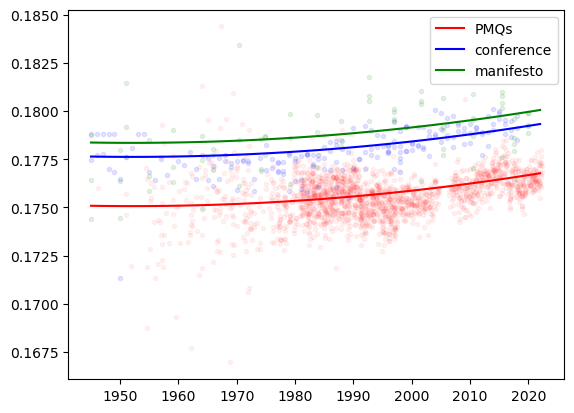

In [6]:
plt.scatter(decomposed[decomposed.type=='PMQs'].date, 
            decomposed[decomposed.type=='PMQs'].vague_score, 
            color='red', marker='.', alpha=0.05)
plt.scatter(decomposed[decomposed.type=='conference'].date, 
            decomposed[decomposed.type=='conference'].vague_score, 
            color='blue', marker='.', alpha=0.1)
plt.scatter(decomposed[decomposed.type=='manifesto'].date, 
            decomposed[decomposed.type=='manifesto'].vague_score, 
            color='green', marker='.', alpha=0.1)

a = vague_quad_mod.params['Intercept']
b1 = vague_quad_mod.params['year']
b2 = vague_quad_mod.params['I(year ** 2)']
x = np.arange(min(decomposed.year),max(decomposed.year)+1)
y = a + b1*x + b2*x**2

plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y,
         color='red', label='PMQs')
plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y+vague_quad_mod.params['C(type)[T.conference]'],
         color='blue', label='conference')
plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y+vague_quad_mod.params['C(type)[T.manifesto]'],
         color='green', label='manifesto')

plt.legend()
plt.show()

### Subjectivity

In [7]:
subj_quad_mod = smf.ols('subj_score ~ year + I(year**2) + C(party) + C(type)', data=decomposed).fit()
print(subj_quad_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             subj_score   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     39.36
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           4.20e-65
Time:                        11:45:41   Log-Likelihood:                 6842.3
No. Observations:                2056   AIC:                        -1.366e+04
Df Residuals:                    2046   BIC:                        -1.361e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                31.41

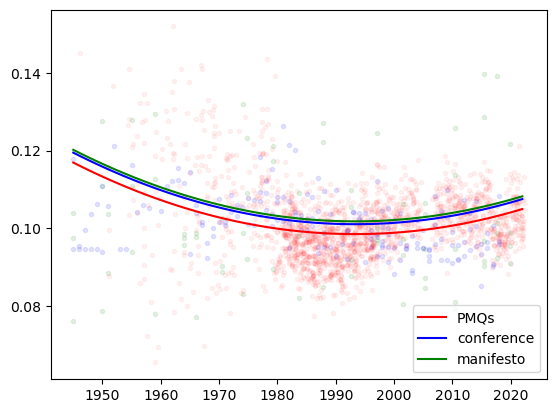

In [8]:
plt.scatter(decomposed[decomposed.type=='PMQs'].date, 
            decomposed[decomposed.type=='PMQs'].subj_score, 
            color='red', marker='.', alpha=0.05)
plt.scatter(decomposed[decomposed.type=='conference'].date, 
            decomposed[decomposed.type=='conference'].subj_score, 
            color='blue', marker='.', alpha=0.1)
plt.scatter(decomposed[decomposed.type=='manifesto'].date, 
            decomposed[decomposed.type=='manifesto'].subj_score, 
            color='green', marker='.', alpha=0.1)

a = subj_quad_mod.params['Intercept']
b1 = subj_quad_mod.params['year']
b2 = subj_quad_mod.params['I(year ** 2)']
x = np.arange(min(decomposed.year),max(decomposed.year)+1)
y = a + b1*x + b2*x**2

plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y,
         color='red', label='PMQs')
plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y+vague_quad_mod.params['C(type)[T.conference]'],
         color='blue', label='conference')
plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y+vague_quad_mod.params['C(type)[T.manifesto]'],
         color='green', label='manifesto')

plt.legend()
plt.show()

### Emotionality

In [9]:
emot_quad_mod = smf.ols('emot_score ~ year + I(year**2) + C(party) + C(type)', data=decomposed).fit()
print(emot_quad_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             emot_score   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          2.14e-246
Time:                        11:45:41   Log-Likelihood:                 8894.9
No. Observations:                2056   AIC:                        -1.777e+04
Df Residuals:                    2046   BIC:                        -1.771e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                13.65

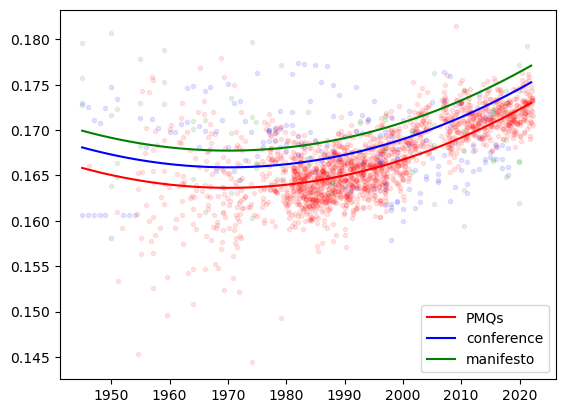

In [12]:
plt.scatter(decomposed[decomposed.type=='PMQs'].date, 
            decomposed[decomposed.type=='PMQs'].emot_score, 
            color='red', marker='.', alpha=0.1)
plt.scatter(decomposed[decomposed.type=='conference'].date, 
            decomposed[decomposed.type=='conference'].emot_score, 
            color='blue', marker='.', alpha=0.1)
plt.scatter(decomposed[decomposed.type=='manifesto'].date, 
            decomposed[decomposed.type=='manifesto'].emot_score, 
            color='green', marker='.', alpha=0.1)

a = emot_quad_mod.params['Intercept']
b1 = emot_quad_mod.params['year']
b2 = emot_quad_mod.params['I(year ** 2)']
x = np.arange(min(decomposed.year),max(decomposed.year)+1)
y = a + b1*x + b2*x**2

plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],y+emot_quad_mod.params['C(party)[T.CON]'],
         color='red', label='PMQs')
plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],
         y+emot_quad_mod.params['C(type)[T.conference]']+emot_quad_mod.params['C(party)[T.CON]'],
         color='blue', label='conference')
plt.plot([pd.to_datetime('01-01-'+str(yr)) for yr in x],
         y+emot_quad_mod.params['C(type)[T.manifesto]']+emot_quad_mod.params['C(party)[T.CON]'],
         color='green', label='manifesto')

plt.legend()
plt.show()

## Modelling with a categorical time-period variable

In [13]:
era_dict = {'1945-1960s':(1945,1965),
            '1960s-1980s':(1965,1985),
            '1980s-2010':(1985,2010),
            '2010-present':(2010,2023)}
decomposed['era'] = decomposed.year.apply(lambda year: [era for era,yrs in era_dict.items() if yrs[0]<=year and year<yrs[1]][0])

### Vagueness

In [15]:
vague_cat_mod = smf.ols('vague_score ~ C(era) + C(party) + C(type)', data=decomposed).fit()
print(vague_cat_mod.summary())

                            OLS Regression Results                            
Dep. Variable:            vague_score   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          1.34e-251
Time:                        11:52:04   Log-Likelihood:                 11087.
No. Observations:                2056   AIC:                        -2.215e+04
Df Residuals:                    2045   BIC:                        -2.209e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

### Subjectivity

In [17]:
subj_cat_mod = smf.ols('subj_score ~ C(era) + C(party) + C(type)', data=decomposed).fit()
print(subj_cat_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             subj_score   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     42.96
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           8.83e-78
Time:                        11:53:16   Log-Likelihood:                 6874.2
No. Observations:                2056   AIC:                        -1.373e+04
Df Residuals:                    2045   BIC:                        -1.366e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

### Emotionality

In [16]:
emot_cat_mod = smf.ols('emot_score ~ C(era) + C(party) + C(type)', data=decomposed).fit()
print(emot_cat_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             emot_score   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          3.54e-214
Time:                        11:52:54   Log-Likelihood:                 8822.6
No. Observations:                2056   AIC:                        -1.762e+04
Df Residuals:                    2045   BIC:                        -1.756e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0